# INF TC1 - TD5 Devoir sur la Quantification des Couleurs

## Introduction
Ce notebook présente le processus de quantification des couleurs d'une image. L'objectif est de réduire le nombre de couleurs tout en préservant une représentation fidèle de l'image originale.

## Configuration et Importation des Bibliothèques


In [1]:
from PIL import Image
from IPython.display import display
from copy import deepcopy
from skimage.color import rgb2lab, deltaE_ciede2000
from matplotlib.colors import ListedColormap

import numpy as np
import random
import matplotlib.pyplot as plt

## Étape 1
### Énoncé : 
Prendre en main une image de votre choix (pas trop grande) en la chargeant avec PIL. Lister les couleurs présentes, identifier celles qui sont uniques et leur fréquence. Vous pouvez pour cela utiliser [Matplotlib](https://matplotlib.org/stable/gallery/index.html)..
### Observations :
Le dictionnaire chemin permet de changer rapidement l'image d'interet : 
<div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="IMG_3135.png" alt="1" style="width:3cm;">
          <p>1</p>
        </td>
        <td>
          <img src="IMG_1964.png" alt="2" style="width:3cm;">
          <p>2</p>
        </td>
        <td>
          <img src="figures/color-rainbow.png" alt="RB" style="width:3cm;">
          <p>RB</p>
        </td>
        <td>
          <img src="figures/4-color.png" alt="4col" style="width:3cm;">
          <p>4col</p>
        </td>
      </tr>
    </table>
  </div>
  
À completer

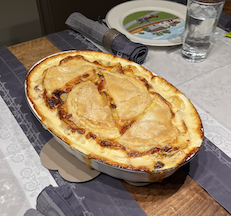

In [44]:
chemin = {'1' : "IMG_3135.png",'2' : "IMG_1964.png",'RB' : "figures/color-rainbow.png", '4col' : "figures/4-color.png"}

choix = '1'

im = Image.open(str(chemin[choix]))
im = im.convert("RGB")  # important pour bien avoir 3 couleurs
display(im)
px = im.load()
w , h = im.size

In [45]:
def dict_couleur(px , w , h) :
    dict_c = {}
    for x in range (w) :
        for y in range (h) :
            if px[x,y] in  dict_c:
                dict_c[px[x,y]] += 1
            else :
                dict_c[px[x,y]] = 1
    return dict_c

In [46]:
im_dict_couleurs = dict_couleur(px, w, h)

## Étape 2
### Énoncé : 
Proposer une méthode (naïve pour commencer) de choix d'une palette de $k$ couleurs. Affichez là sous forme d'image (exemple de d'image au milieu de la figure du dessus) avec une nouvelle image PIL. Utilisez également des images simples où le résultat attendu est connu comme mour les images ci-dessous :
  <div style="text-align:center;">
    <table>
      <tr>
        <td>
          <img src="figures/1-color-back.png" alt="1 couleur noir" style="width:3cm;">
          <p>1 couleur noir</p>
        </td>
        <td>
          <img src="figures/4-color.png" alt="4 couleurs" style="width:3cm;">
          <p>4 couleurs</p>
        </td>
      </tr>
    </table>
  </div>
  
### Observations :
A completer


In [47]:
def palette_naive(dict_couleurs , k):
    pal = []  # Initialiser une liste vide pour stocker la palette de couleurs

    for i in range(k):  
        max = 0  # Initialiser 'max', fréquence la plus élevée trouvée
        key_max = (0, 0, 0)  # Initialiser 'key_max' pour stocker la couleur avec la fréquence la plus élevée

        for key in dict_couleurs:  # Parcourir toutes les couleurs (clés) dans le dictionnaire pour trouver la plus fréquente
            if dict_couleurs[key] > max:  # Si la fréquence actuelle de la couleur est supérieure au 'max' courant
                max = dict_couleurs[key]  
                key_max = key  

        pal.append(key_max)  # Ajouter la couleur sélectionnée à la palette 'pal'
        dict_couleurs[key_max] = -1  # Mettre sa fréquence à -1 pour ne plus la séléctionner
        
    return pal 

In [48]:
def plot_color_palette(palette):
    # Convertir les valeurs RGB (de 0-255) en valeurs normalisées (0-1) pour Matplotlib
    palette = np.array(palette) / 255.0

    # Créer une carte de couleurs personnalisée avec les valeurs RGB fournies
    custom_cmap = ListedColormap(palette)

    # Créer une matrice de données pour l'affichage des couleurs
    # Chaque couleur sera affichée dans une colonne distincte
    data = np.arange(len(palette)).reshape(-1, 1)

    # Créer une figure et un axe avec Matplotlib
    fig, ax = plt.subplots(figsize=(1,len(palette)))  # Taille de la figure basée sur le nombre de couleurs

    # Utiliser pcolormesh pour afficher la carte de couleurs sur l'axe
    # Cela crée une série de rectangles colorés pour chaque couleur de la palette
    cax = ax.pcolormesh(data, cmap=custom_cmap, edgecolors='w', linewidth=0.5)

    # Enlever les graduations de l'axe des y car elles ne sont pas nécessaires
    ax.set_yticks([])

    # Ajuster les graduations de l'axe des x pour qu'elles correspondent aux couleurs
    ax.set_xticks(np.arange(0.5, 1, len(palette)))
    ax.set_xticklabels([])  # Enlever les étiquettes de l'axe des x

    # Afficher le graphique
    plt.show()


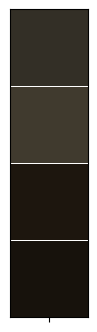

In [49]:
nb_couleurs = 4

im_palette_naive = palette_naive(im_dict_couleurs,nb_couleurs)
plot_color_palette(im_palette_naive)

## Étape 3
### Énoncé : 
Re-colorier une image avec une palette de $k$ couleurs, et afficher le résultat sous forme d'image PIL. Pour re-colorier chaque pixel, prendre la couleur la plus proche dans la palette en utilisant une fonction de distance (Euclidienne par exemple).

### Observations :
- Pour recolorier une image, nous avons dans un premier temps besoin d'une fonction de calcule de distance entre 2 couleurs. Nous avons donc implmenté la fonction dist_eu qui calcule la distance euclidienne entre 2 couleurs.
>**Formule de la Distance Euclidienne :**
>La distance euclidienne entre deux couleurs $c_1$ et $c_2$, représentées chacune par un triplet RGB est calculée comme suit :
>$$
>d(c_1, c_2) = \sqrt{(R_2 - R_1)^2 + (G_2 - G_1)^2 + (B_2 - B_1)^2}
>$$
>où $R_1, G_1, B_1$ sont les composantes Rouge, Vert et Bleu de la couleur $c_1$, et $R_2, G_2, B_2$ sont celles de la couleur $c_2$. Chaque composant est une valeur comprise entre 0 et 255.


In [50]:
def dist_eu(c1,c2) :
    return ((c1[0] - c2[0])**2 + (c1[1] - c2[1])**2 + (c1[2] - c2[2])**2)**(1/2)

def recolorier_eucl(im , palette):
    im_2 = im.copy()
    px_2 = im_2.load()
    w , h = im_2.size
    k = len(palette)
    for i in range (w) :
        for j in range (h) :
            c = px_2[i,j]
            min = dist_eu(c , palette[0])
            l_min = 0
            for l in range (k) :
                if dist_eu(px_2[i,j] , palette[l]) < min :
                    min = dist_eu(c , palette[l])
                    l_min = l
            px_2[i,j] = palette[l_min]
    return(im_2)

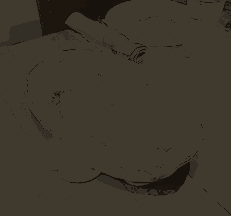

In [51]:
im_recolorier_pal_naive = recolorier_eucl(im, im_palette_naive)
display(im_recolorier_pal_naive)

## Étape 4
### Énoncé : 
Proposer une méthode de validation de votre approche. Par exemple afficher la différence entre l'image originale et celle re-coloriée. Calculer un score global d'erreur.

### Observations :
- Pour recolorier une image, nous avons dans un premier temps besoin d'une fonction de calcule de distance entre 2 couleurs. Nous avons donc implmenté la fonction dist_eu qui calcule la distance euclidienne entre 2 couleurs.

In [52]:
def compare_images(original, recolored):
    # Convertir les deux images en format RGB pour assurer la compatibilité
    original_rgb = original.convert('RGB')
    recolored_rgb = recolored.convert('RGB')

    original_data = np.array(original_rgb)
    recolored_data = np.array(recolored_rgb)

    # Calcul de l'erreur moyenne par pixel
    erreur = np.mean(np.abs(original_data - recolored_data))
    return erreur

In [53]:
erreur_palette_naive = compare_images(im,im_recolorier_pal_naive)
print(f"Erreur avec votre méthode: {erreur_palette_naive}")

Erreur avec votre méthode: 99.69606114050559


## Étape 5
### Énoncé : 
Améliorer le choix des $k$ couleurs afin de minimiser l'erreur entre l'image originale et re-coloriée. Une piste possible est de trier les couleurs dans une liste, diviser cette liste en $k$ intervals de couleurs et prendre la couleur du milieu de chaque interval. D'autres méthodes plus avancées peuvent être explorées !

### Observations :
- Pour recolorier une image, nous avons dans un premier temps besoin d'une fonction de calcule de distance entre 2 couleurs. Nous avons donc implmenté la fonction dist_eu qui calcule la distance euclidienne entre 2 couleurs.

In [56]:
def palette_kmeans(dict_couleurs , k):
    keys = list(dict_couleurs.keys())
    centroids = [keys[i] for i in random.sample(range(len(keys)), k)]
    variation = True

    while variation:
        centroids2 = []
        cluster = [[] for _ in range(k)]
    #On compare la distance de la couleur "key" a chaque centroid
        for key in keys :

#Indice du centroid duquel la couleur qu'on considere est le plus proche
 
            i_min = 0
            for i in range (k) :
                if dist_eu(centroids[i_min],key) > dist_eu(centroids[i],key):
                    i_min = i           
            cluster[i_min].append(key)

#Calcul de la moyenne de la couleur de chaque groupe (à la main)

        for i in range (k):
            n_i = len(cluster[i])
            S_r = 0
            S_v = 0
            S_b = 0
            for j in range (n_i):
                S_r += cluster[i][j][0]
                S_v += cluster[i][j][1]
                S_b += cluster[i][j][2]
            moy_r = S_r//n_i
            moy_v = S_v//n_i
            moy_b = S_b//n_i
            centroids2.append((moy_r , moy_v , moy_b))

        
#Si les nouveaux centroides sont egaux aux anciens, alors il n'y a plus de variation

        if set(centroids2) == set(centroids) :
            variation = False
        else :
            centroids = centroids2
    
    return centroids

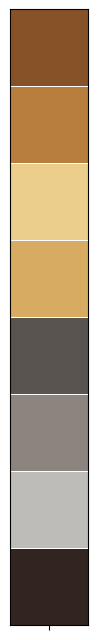

In [57]:
nb_couleurs = 8

im_palette_kmeans = palette_kmeans(im_dict_couleurs, nb_couleurs)
plot_color_palette(im_palette_kmeans)

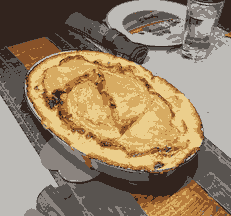

In [59]:
im_recolorier_pal_kmean= recolorier_eucl(im, im_palette_kmeans)
display(im_recolorier_pal_kmean)

### Comparaison des 2 methodes

In [ ]:
nb_couleurs = 20

im_palette_naive = palette_naive(im_dict_couleurs,nb_couleurs)
im_palette_kmeans = palette_kmeans(im_dict_couleurs, nb_couleurs)

plot_color_palette(im_palette_naive)
plot_color_palette(im_palette_kmeans)

im_recolorier_pal_naive= recolorier_eucl(im, im_palette_naive)
im_recolorier_pal_kmean= recolorier_eucl(im, im_palette_kmeans)

erreur_palette_naive = compare_images(im,im_recolorier_pal_naive)
erreur_palette_kmean = compare_images(im,im_recolorier_pal_kmean)

print(f"Erreur avec la méthode naïve: {erreur_palette_naive}")
print(f"Erreur avec la méthode de K-mean: {erreur_palette_kmean}")

display(im_recolorier_pal_naive)
display(im_recolorier_pal_kmean)

## Étape 6
### Énoncé : 
Tester sur plusieurs images de votre choix ou générées automatiquement avec un nombre et une distribution connue de couleurs. Comparer les performances de vos techniques avec d'autres méthodes (cette fois vous pouvez utiliser un éditeur de texte ou la fonction _quantize_ de PIL [(doc)](https://pillow.readthedocs.io/en/stable/reference/Image.html).

### Observations :
- Pour recolorier une image, nous avons dans un premier temps besoin d'une fonction de calcule de distance entre 2 couleurs. Nous avons donc implmenté la fonction dist_eu qui calcule la distance euclidienne entre 2 couleurs.

In [63]:
#Quatification de couleur de PIL 
def pil_quantize_image(image, num_colors):
    quantized = image.quantize(colors=num_colors)
    return quantized

Image original : 


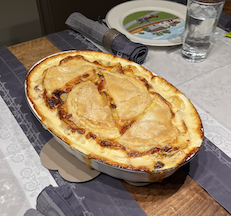

Image re-coloriée avec la méthode K-mean : 
Erreur avec la méthode K-mean: 120.67229170006948


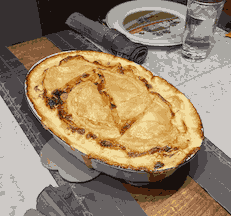

Image re-coloriée avec la méthode de PIL : 
Erreur avec la méthode PIL: 112.44080353802576


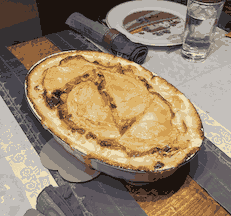

In [66]:
# Appliquer votre méthode de quantification des couleurs
nb_couleurs = 20
im_palette_kmeans = palette_kmeans(im_dict_couleurs, nb_couleurs)

# Appliquer la quantification de couleur de PIL
im_recolorier_pal_kmean= recolorier_eucl(im, im_palette_kmeans)
im_recolorier_pil = pil_quantize_image(im, nb_couleurs)

# Comparer les images
erreur_palette_kmean = compare_images(im, im_recolorier_pal_kmean)
erreur_pil = compare_images(im, im_recolorier_pil)


print("Image original : ")
display(im)
print("Image re-coloriée avec la méthode K-mean : ")
print(f"Erreur avec la méthode K-mean: {erreur_palette_kmean}")
display(im_recolorier_pal_kmean)
print("Image re-coloriée avec la méthode de PIL : ")
print(f"Erreur avec la méthode PIL: {erreur_pil}")
display(im_recolorier_pil)

## Étape 7
### Énoncé : 
Utiliser un pré-traitement des images (flou gaussien, etc) afin de lisser les couleurs est une piste afin de choisir de meilleurs couleurs représentatives. Proposez une quantification de cette amélioration (ou de déterioration éventuelle).

### Observations :
- Les operations etant coupteuse, nous passons en niveau de gris

In [67]:
def conversion_gris(px, W: int, H: int) -> None:
    for x in range(0, W):
        for y in range(0, H):
            m = int(0.30*px[x, y][0] + 0.59*px[x, y][1] + 0.11*px[x, y][2])
            px[x, y] = (m, m, m)

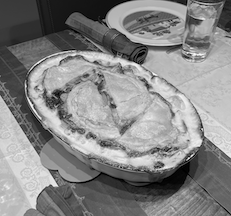

In [68]:
im_gris = im.copy()
px_gris = im_gris.load()
conversion_gris(px_gris,w,h)
dict_couleur

im_dict_couleurs_gris = dict_couleur(px_gris, w, h)
display(im_gris)

In [69]:
def somme_matrice(m: list = []):
    s = 0
    for row in m:
        s += sum(row)
    return s

def convolution(px, W: int, H: int, m: list):
    
    w = len(m)
    h = len(m[0])
    wp = int((w - 1) / 2)
    hp = int((h - 1) / 2)

    for x in range(wp, W - wp):
        for y in range(hp, H - hp):
            sum = 0
            for a in range(-wp, wp + 1):
                for b in range(-hp, hp + 1):
                    sum += px[x + a, y + b][0] * m[a + wp][b + hp]
            v = int(sum / somme_matrice(m))
            px[x, y] = v, v, v

In [75]:
def palette_kmeans_gauss(im,k,g=3):
    im_gauss = im.copy()
    w , h = im.size
    px_gauss = im_gauss.load()
    conversion_gris(px_gauss,w,h)
    if g == 3:
        mat = [[1,2,1],[2,4,2],[1,2,1]]
    elif g == 7:
        mat = [[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]]
    convolution(px_gauss,w,h,mat)
    return(palette_kmeans(dict_couleur(px_gauss,w,h),k))


In [76]:
nb_couleurs = 20

im_palette_kmeans_gauss = palette_kmeans_gauss(im_gris,nb_couleurs)

In [ ]:
A TERMIER : 

nb_couleurs = 20

im_palette_kmeans_gauss = palette_kmeans_gauss(im_gris,nb_couleurs)

im_recolorier = recolorier_image_km(im_gris, 20)
recolored_image_sans_g = recolorier_image_km(im_gris_original.copy(), 20)
error_g = compare_images(im_gris_original, recolored_image_g)
error_sans_g = compare_images(im_gris_original, recolored_image_sans_g)

print(f"Erreur avec gauss: {error_g}")
print(f"Erreur sans gauss: {error_sans_g}")


im_gris.show()
recolored_image_g.show()
recolored_image_sans_g.show()